##Model Development

The objective here is to develop several models in Python that will predict the car price using the variables and features. The Automobile dataset is provided by an online source.

The models will help in understanding the relationship between various variables and how they are used to predict the result.


In [75]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
#loading data and storing in df

URL= 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(URL)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


##Linear Regression

Linear function:    Yhat = a + b  X\
(a) refers to the intercept of the regression line, in other words: the value of Y when X is 0\
(b) refers to the slope  of the regression line, in other words: the value with which Y changes when X increases by 1 unit



"Simple Linear Regression is a method to help us understand the relationship between two variables:\
 The predictor/independent variable (X)\
 The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a linear function that predicts the response(dependent) variable as a function of the predictor (independent) variable."


In [77]:
#impoting modules for Linear Regression

from sklearn.linear_model import LinearRegression

In [78]:
#creating a linear regression object
lm=LinearRegression()
lm

LinearRegression()

##Highway-mpg as the Predictor Variable for Price

I'm going to use a simple linear regression model and use the highway-mpg as the predictor variable (X) to predict price (Y-the response variable).

In [79]:
X=df[['highway-mpg']]
Y=df['price']

In [80]:
#fitting the linear model using the defined X nd Y
lm.fit(X,Y)

LinearRegression()

In [81]:
#outputting a prediction (Yhat)

Yhat=lm.predict(X)
Yhat[0:3]

array([16236.50464347, 16236.50464347, 17058.23802179])

In [82]:
#calculating the value of interception
lm.intercept_


38423.305858157415

In [83]:
#calculating the slope
lm.coef_

array([-821.73337832])

So now by plugging in our values in the linear function from prior we'll get:
Yhat=(38423.30)-821.73*(highway-mpg)

##Engine-size as the Predictor Variable for Price

Now using another simple linear regression model to use the engine-size as the predictor (X2), to predict the price (Yhat).


In [46]:
#creating the linear regression object
Lm1=LinearRegression()
Lm1

#Defining X2 and Y2
X1=df[['engine-size']]
Y1=df['price']

In [47]:
#Fitting the new model
Lm1.fit(X1,Y1)

LinearRegression()

In [51]:
#now calculating the intercept and also the slope
print("The intercept value is",Lm1.intercept_)
print("the slope is equal to", Lm1.coef_)

The intercept value is -7963.338906281042
the slope is equal to [166.86001569]


Thus, we can now put the linear equation together to predict the price as:
Yhat= -7963.34+ 166.86* (engine-size)

##Multiple Linear Regression

Here I'm going to develop a Multiple Linear Regression model to predict the price of a car. In Multiple Linear Regression models we use multiple predictor variables. The MLR method is used to show the relationship between a dependent variable (continous response-Y) with two or more predictors (independent variables-X1,X2, X3..).

In another notebook, the same dataset was analyzed and some good predictor of the prices were identified. These predictors are going to be used here to develop our model:\
-horsepower\
-engine-size\
-curb-weight\
-highway-mpg


In [84]:
#defining a df that includes all predictors
Q=df[['horsepower', 'engine-size','curb-weight', 'highway-mpg']]

In [85]:
#fitting the new model
lm.fit(Q, df['price'])

LinearRegression()

In [54]:
#calculating the interception
lm.intercept_

-15806.624626329249

In [86]:
#calcuting the coefficients
lm.coef_

array([53.49574423, 81.53026382,  4.70770099, 36.05748882])

The final linear function will be in this format:
Yhat = a + b1*X1 + b2*X2 + b3*X3 + b4*X4

So in this example our MLR model to predict the price looks like this:

Price= -15806.62+ 53.50*(horsepower)+ 81.53*(engine-size)+ 4.7*(curb-weight)+36.06*(highway-mpg)

Now that we know how to develop a model, we need to choose good methods to evaluate it.

##Model Evaluation Using Visualization

I'm going to use some visualization methods to evaluate the models.

In [58]:
#importing seaborn

import seaborn as sns
%matplotlib inline

###Regression Plot

A regression plot consists of a scatter plot (showing data points) and a regression line fitting the data. The regression plot is a good way to demonstrate a linear regression model. It shows the relationship between the two variables, the strength of the correlation and also if the trend is positive/negative.

(0.0, 48171.1889015155)

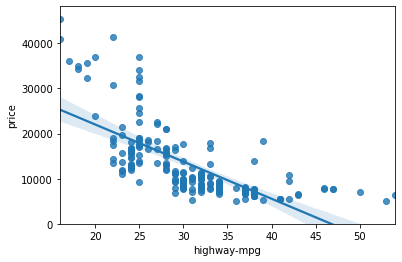

In [87]:
#graphing the regression plot

sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

From the plot we can see that the highway-mpg and the car's price have a negative correlation. 
We can also tell the extend of variation in our data based on how scattered the data are. Also if a linear model fits the data or not! Here, the linear model is a good fit.

We can calculate the correlation degree using the .corr() method:

In [88]:
#the correlation degree between the highway-mpg and price
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


The correlation degree is -0.705 thus a simple linear regression model is a good fit.

Another great way to evaluate our model using visualization method is through a residual plot!

###Residual Plot

A residual plot shows the difference between the obsereved value (Y) and the predicted value (Yhat), which is called the residual. In the residual plot, the residual values are in the y-axis, and the independent variables are on the x-axis. This plot is a great way to determine if we need a linear model or other models.

If the data points are randomly spread out around the x-axis in the residual plot, it shows that the variance is constant and thus a linear model fit the data perfectly!

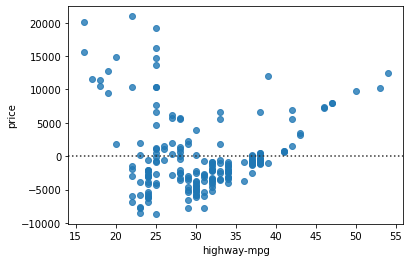

In [89]:
# graphing the residual plot for the highway-mp and price
sns.residplot(x='highway-mpg', y='price', data=df)
plt.show()

The data points are not evenly spread out around the x-axis which means that a non-linear model might be a better fit for our data!! I will consider a polynomial regression in the next coming sections for the highway-mpg vs price!


###Distribution Plot for Multiple Linear Regression Model

Visualizing a Multiple Linear Regression model is a bit more complicated! 
But one way is to use the distribution plot and graph the fitted values resulted from the model, and compare it to the actual values.

In [110]:
#making a prediction

Y_hat=lm.predict(Q)

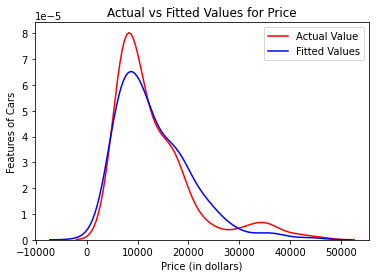

In [111]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Features of Cars')

plt.show()
plt.close()

The Fitted Values are reasonably close to the Actual data, however there are still room for improvement!

##Polynomial Regression

Earlier we saw that from the residual plot that a linear model wasn't a good fit to show the relationship between the highway-mpg and price! Here I'm going to try out the polynomial regression model to see if it is a better fit!

In [106]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Price')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    

In [107]:
x = df['highway-mpg']
y = df['price']

In [108]:
#using a polynomial of the 3rd order (cubic) 

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


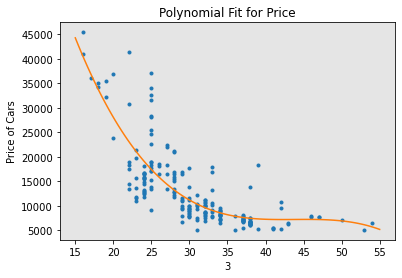

In [109]:
#plotting the polynomial
PlotPolly(p,x,y,3)

As we can see the regression line is fitting the data much better than the linear model! Thus the polynomial model is a better fit in this case!

##Measures for In-Sample Evaluation

We can use quantitative measures to evaluate how accurate our models are. The following methods can give us quantitative values that shows our models accurance:

- R-square method: R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
 The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

- Mean Squared Error (MSE):The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ)

Here, the R-square and MSE of the three previous models (Single Linear Regression, Multiple Linear Regression and Polynomial Regression) are going to be calculated and compared for us to determine which model is more accurate in predicting the price!

In [114]:
#R-square for highway-mpg for SLR model
lm.fit(X,Y)
lm.score(X,Y)
print("The R^2 for the SLR model is:", lm.score(X,Y))


The R^2 for the SLR model is: 0.4965911884339176


The R^2 result show that around 49.66% of the variation in price is shown using the SLR model and the highway-mpg as the predictor.

To calculate the MSE value we need to first come up with some predicted data points:

In [115]:
Y_hat=lm.predict(X)
print("The output of the first five predicted values are:", Y_hat[0:5])

The output of the first five predicted values are: [16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]


Now let's calcure the MSE for our model:

In [116]:
#MSE for the SLR model and highway-mpg as the predictor
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'], Yhat)
print('The Mean Square Error of price and predicted value is: ', mse)

The Mean Square Error of price and predicted value is:  31635042.944639888


I'm going to calcuate the R-square and MSE values for the second model; Multiple Linear Regression model:

In [118]:
#fiting the model 
lm.fit(Q, df['price'])

#calculating R^2 for MLR model 
print('The R-square is: ', lm.score(Q, df['price']))

The R-square is:  0.8093562806577457


Based on the R^2 value, around 81% of the variation in price is explained using the MLR model.

Now, I'm going to find the MSE value for the MLR model. First we need to figureo out some predicted values:

In [121]:
Y_multifit=lm.predict(Q)
Y_multifit[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [122]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Last but not least, I'm going to calculate the R-square and the MSE for the third model; Polynomial Regression.

We need to import a different function for our polynomial regression model:

In [123]:
from sklearn.metrics import r2_score

In [124]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


Around 67.42% of the variation in price is explained using the polynomial fit.

In [125]:
#calculating the MSE for the polynomial fit
mean_squared_error(df['price'], p(x))

20474146.426361218

##Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, it is time for the decision making! Which model fits best?

-When comparing models, the model with the higher R-squared value is a better fit for the data.\
-When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models:

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.\
R-squared: 0.49659118843391759\
MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.\
R-squared: 0.80896354913783497\
MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.\
R-squared: 0.6741946663906514\
MSE: 2.05 x 10^7

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared compared to the Single Linear Regression model, we can conclude that this was a better fit model than the SLR for predicting Price with Highway-mpg as a predictor variable.

However comparing the Multiple Linear Regression model to the Polynomial, the R-square values is larger, and the MSE value is much smaller! Thus we can conclude that the MLR model fit our data best and it is the best model to use for predicting the car prices.